In [380]:
# import libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from bokeh.io import export_png
from bokeh.models import ColumnDataSource, DataTable, TableColumn
from kaleido.scopes.plotly import PlotlyScope

In [313]:
# import forecasting library
import pyaf.ForecastEngine as autof

In [411]:

# Read in the data
df = pd.read_csv('data/MORTGAGE30US.csv')
df['DATE'] = df['DATE'].apply(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d"))
# add a unique index column
df['index'] = range(0, len(df))
df.set_index('index', inplace=True)
# rename the 'MORTGAGE30US' column to 'Mortgage Rate'
df.rename(columns={'MORTGAGE30US_NBD19710401': 'Mortgage Rate'}, inplace=True)
# remove the last row
df = df[:-1]
# convert the 'Mortgage Rate' column to a float
df['Mortgage Rate'] = df['Mortgage Rate'].astype(float)
df.head()


,DATE,Mortgage Rate
index,,
0,1971-04-01,100.00000
1,1971-05-01,101.57319
2,1971-06-01,103.00958
3,1971-07-01,104.02189
4,1971-08-01,105.30096


In [412]:
# split the data into train and test sets
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]
horizon = len(test)

In [413]:
train.shape

(614, 2)

In [414]:
test.shape

(12, 2)

In [415]:
# create a model
lEngine = autof.cForecastEngine()

In [416]:
# get the best model
lEngine.train(train, 'DATE' , 'Mortgage Rate' , horizon)

INFO:pyaf.timing:('OPERATION_START', ('SIGNAL_TRAINING', {'Signals': ['Mortgage Rate'], 'Transformations': [('Mortgage Rate', 'None', '_', 'T+S+R'), ('Mortgage Rate', 'None', 'Diff_', 'T+S+R'), ('Mortgage Rate', 'None', 'RelDiff_', 'T+S+R'), ('Mortgage Rate', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 4.062, ('SIGNAL_TRAINING', {'Signals': ['Mortgage Rate'], 'Transformations': [('Mortgage Rate', 'None', '_', 'T+S+R'), ('Mortgage Rate', 'None', 'Diff_', 'T+S+R'), ('Mortgage Rate', 'None', 'RelDiff_', 'T+S+R'), ('Mortgage Rate', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))
INFO:pyaf.timing:('OPERATION_START', ('FINALIZE_TRAINING', {'Signals': ['Mortgage Rate'], 'Transformations': [('Mortgage Rate', [('Mortgage Rate', 'None', 'CumSum_', 'T+S+R'), ('Mortgage Rate', 'None', 'Diff_', 'T+S+R'), ('Mortgage Rate', 'None', 'RelDiff_', 'T+S+R'), ('Mortgage Rate', 'None', '_', 'T+S+R')])], 'Cores': 1}))
INFO:pyaf.timing:('OPERATION_START', ('MODEL_SELECTI

In [417]:
# review the model
lEngine.getModelInfo()

INFO:pyaf.std:TIME_DETAIL TimeVariable='DATE' TimeMin=1971-04-01T00:00:00.000000 TimeMax=2011-04-01T00:00:00.000000 TimeDelta=<DateOffset: months=1> Horizon=12
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='Mortgage Rate' Length=614  Min=36.71683 Max=252.4487  Mean=106.349953 StdDev=44.980847
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='_Mortgage Rate' Min=0.0 Max=1.0  Mean=0.322776 StdDev=0.208503
INFO:pyaf.std:DECOMPOSITION_TYPE 'T+S+R'
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_Mortgage Rate_Lag1Trend_residue_bestCycle_byMAPE_residue_NoAR' [Lag1Trend + Cycle_None + NoAR]
INFO:pyaf.std:TREND_DETAIL '_Mortgage Rate_Lag1Trend' [Lag1Trend]
INFO:pyaf.std:CYCLE_DETAIL '_Mortgage Rate_Lag1Trend_residue_bestCycle_byMAPE' [Cycle_None]
INFO:pyaf.std:AUTOREG_DETAIL '_Mortgage Rate_Lag1Trend_residue_bestCycle_byMAPE_residue_NoAR' [NoAR]
INFO:pyaf.std:MODEL_MAPE MAPE_Fit=0.0213 MAPE_Forecast=0.0252 MAPE_Test=0.0523
INFO:pyaf.std:MODEL_

In [418]:
# review the model's performance
lEngine.mSignalDecomposition.mTrPerfDetails


,Split,Transformation,DecompositionType,Model,DetailedFormula,Category,Complexity,FitMAPE,ForecastMAPE,TestMAPE
0,None,_Mortgage Rate,T+S+R,_Mortgage Rate_Lag1Trend_residue_bestCycle_byM...,"(_Mortgage Rate, T+S+R, None, _Mortgage Rate_L...",NoTransf_Lag1Trend_Cycle_None_AR,66.0,0.0204,0.0249,0.0517
1,None,_Mortgage Rate,T+S+R,_Mortgage Rate_Lag1Trend_residue_zeroCycle[0.0...,"(_Mortgage Rate, T+S+R, None, _Mortgage Rate_L...",NoTransf_Lag1Trend_NoCycle_AR,66.0,0.0204,0.0249,0.0517
2,None,_Mortgage Rate,T+S+R,_Mortgage Rate_Lag1Trend_residue_bestCycle_byM...,"(_Mortgage Rate, T+S+R, None, _Mortgage Rate_L...",NoTransf_Lag1Trend_Cycle_None_NoAR,2.0,0.0213,0.0252,0.0523
3,None,_Mortgage Rate,T+S+R,_Mortgage Rate_Lag1Trend_residue_zeroCycle[0.0...,"(_Mortgage Rate, T+S+R, None, _Mortgage Rate_L...",NoTransf_Lag1Trend_NoCycle_NoAR,2.0,0.0213,0.0252,0.0523
4,None,CumSum_Mortgage Rate,T+S+R,CumSum_Mortgage Rate_Lag1Trend_residue_bestCyc...,"(CumSum_Mortgage Rate, T+S+R, None, CumSum_Mor...",Integration_Lag1Trend_Cycle_None_NoAR,3.0,0.0226,0.0252,0.0523
...,...,...,...,...,...,...,...,...,...,...
91,None,Diff_Mortgage Rate,T+S+R,Diff_Mortgage Rate_PolyTrend_residue_Seasonal_...,"(Diff_Mortgage Rate, T+S+R, None, Diff_Mortgag...",Difference_PolyTrend_Seasonal_MonthOfYear_NoAR,16.0,0.5700,2.0637,1.9571
92,None,CumSum_Mortgage Rate,T+S+R,CumSum_Mortgage Rate_ConstantTrend_residue_bes...,"(CumSum_Mortgage Rate, T+S+R, None, CumSum_Mor...",Integration_ConstantTrend_Cycle_5_NoAR,6.0,1.5111,2.0973,2.2785
93,None,CumSum_Mortgage Rate,T+S+R,CumSum_Mortgage Rate_LinearTrend_residue_Seaso...,"(CumSum_Mortgage Rate, T+S+R, None, CumSum_Mor...",Integration_LinearTrend_Seasonal_MonthOfYear_NoAR,14.0,0.7084,2.1610,2.3763
94,None,Diff_Mortgage Rate,T+S+R,Diff_Mortgage Rate_LinearTrend_residue_Seasona...,"(Diff_Mortgage Rate, T+S+R, None, Diff_Mortgag...",Difference_LinearTrend_Seasonal_MonthOfYear_NoAR,14.0,0.3717,2.2703,3.6314


In [420]:
# look at the forecast
forecast_df = lEngine.forecast(df, 12)
forecast_df['Mortgage Rate_Forecast'].tail(12)

INFO:pyaf.timing:('OPERATION_START', ('FORECASTING', {'Signals': ['Mortgage Rate'], 'Horizon': 12}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.115, ('FORECASTING', {'Signals': ['Mortgage Rate'], 'Horizon': 12}))


626    87.8933
627    87.8933
628    87.8933
629    87.8933
630    87.8933
631    87.8933
632    87.8933
633    87.8933
634    87.8933
635    87.8933
636    87.8933
637    87.8933
Name: Mortgage Rate_Forecast, dtype: float64

In [391]:
# show the column names
forecast_df.columns

Index(['DATE', 'Construction', 'row_number', 'DATE_Normalized',
       '_Construction', '_Construction_Lag1Trend',
       '_Construction_Lag1Trend_residue',
       '_Construction_Lag1Trend_residue_bestCycle_byMAPE',
       '_Construction_Lag1Trend_residue_bestCycle_byMAPE_residue',
       '_Construction_Lag1Trend_residue_bestCycle_byMAPE_residue_NoAR',
       '_Construction_Lag1Trend_residue_bestCycle_byMAPE_residue_NoAR_residue',
       '_Construction_Trend', '_Construction_Trend_residue',
       '_Construction_Cycle', '_Construction_Cycle_residue',
       '_Construction_AR', '_Construction_AR_residue',
       '_Construction_TransformedForecast', 'Construction_Forecast',
       '_Construction_TransformedResidue', 'Construction_Residue',
       'Construction_Forecast_Lower_Bound',
       'Construction_Forecast_Upper_Bound', 'Construction_Forecast_Quantile_5',
       'Construction_Forecast_Quantile_14',
       'Construction_Forecast_Quantile_23',
       'Construction_Forecast_Quantile_3

<AxesSubplot:xlabel='DATE'>

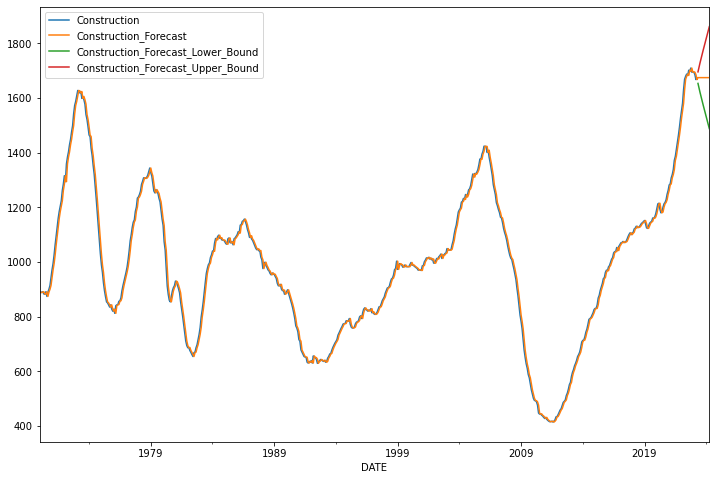

In [392]:
# acquire critical values and compare visually
forecast_df.plot.line('DATE', ['Construction', 'Construction_Forecast', 'Construction_Forecast_Lower_Bound', 'Construction_Forecast_Upper_Bound'], figsize=(12, 8))

In [393]:
# use the model to forecast into the future
future_df = lEngine.forecast(df, 12)
# show the forecast rows
future_df.tail(20)

INFO:pyaf.timing:('OPERATION_START', ('FORECASTING', {'Signals': ['Construction'], 'Horizon': 12}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.088, ('FORECASTING', {'Signals': ['Construction'], 'Horizon': 12}))


,DATE,Construction,row_number,DATE_Normalized,_Construction,_Construction_Lag1Trend,_Construction_Lag1Trend_residue,_Construction_Lag1Trend_residue_bestCycle_byMAPE,_Construction_Lag1Trend_residue_bestCycle_byMAPE_residue,_Construction_Lag1Trend_residue_bestCycle_byMAPE_residue_NoAR,...,Construction_Forecast_Quantile_14,Construction_Forecast_Quantile_23,Construction_Forecast_Quantile_32,Construction_Forecast_Quantile_41,Construction_Forecast_Quantile_50,Construction_Forecast_Quantile_59,Construction_Forecast_Quantile_68,Construction_Forecast_Quantile_77,Construction_Forecast_Quantile_86,Construction_Forecast_Quantile_95
632,2022-09-01,1698.0,632,1.287206,1.023108,1.026295,-0.003187,0,-0.003187,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
633,2022-10-01,1710.0,633,1.289213,1.032669,1.023108,0.009562,0,0.009562,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
634,2022-11-01,1695.0,634,1.291287,1.020717,1.032669,-0.011952,0,-0.011952,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
635,2022-12-01,1696.0,635,1.293295,1.021514,1.020717,0.000797,0,0.000797,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
636,2023-01-01,1695.0,636,1.295369,1.020717,1.021514,-0.000797,0,-0.000797,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
637,2023-02-01,1686.0,637,1.297444,1.013546,1.020717,-0.007171,0,-0.007171,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
638,2023-03-01,1668.0,638,1.299317,0.999203,1.013546,-0.014343,0,-0.014343,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639,2023-04-01,1675.0,639,1.301392,1.004781,0.999203,0.005578,0,0.005578,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
640,2023-05-01,NaN,640,1.303399,NaN,1.004781,NaN,0,NaN,0.0,...,1658.22,1662.29,1664.00,1666.00,1668.0,1670.00,1671.00,1672.00,1674.78,1681.70
641,2023-06-01,NaN,641,1.305474,NaN,1.004781,NaN,0,NaN,0.0,...,1647.00,1650.29,1653.36,1657.00,1659.0,1662.00,1666.64,1669.71,1675.00,1682.85


In [394]:
future_df[['DATE', 'Construction', 'Construction_Forecast']].tail(20)


,DATE,Construction,Construction_Forecast
632,2022-09-01,1698.0,1702.0
633,2022-10-01,1710.0,1698.0
634,2022-11-01,1695.0,1710.0
635,2022-12-01,1696.0,1695.0
636,2023-01-01,1695.0,1696.0
637,2023-02-01,1686.0,1695.0
638,2023-03-01,1668.0,1686.0
639,2023-04-01,1675.0,1668.0
640,2023-05-01,NaN,1675.0
641,2023-06-01,NaN,1675.0


In [358]:
# add an additional 24 months of blank data to the original dataframe
df2 = df.append(pd.DataFrame({'DATE': pd.date_range(start='2023-04-01', periods=12, freq='MS')}))
df2['index'] = range(0, len(df2))
df2.set_index('index', inplace=True)
df2.shape


(1180, 2)

In [359]:
forecast_df.shape

(1180, 40)

In [360]:
# fill the price index forecast column with the forecast data
df2['Lumber Price Index_Forecast'] = future_df['Lumber Price Index_Forecast'].values
# for values after 2023-03-01, fill with NaN
for i in range(0, 11):
    df2['Lumber Price Index_Forecast'][len(df2)-11+i] = np.nan
    
# for values after 2023-03-01, fill with Lumber Price Index_Forecast
df2['Lumber Price Index_Forecast'].fillna(value=future_df['Lumber Price Index_Forecast'], inplace=True)

df2.tail(36)

,DATE,Lumber Price Index,Lumber Price Index_Forecast
index,,,
1144,2021-05-01,358.000,326.100
1145,2021-06-01,360.600,358.000
1146,2021-07-01,324.308,360.600
1147,2021-08-01,300.876,324.308
1148,2021-09-01,293.026,300.876
1149,2021-10-01,297.671,293.026
1150,2021-11-01,301.796,297.671
1151,2021-12-01,319.323,301.796
1152,2022-01-01,349.222,319.323


In [361]:
# use plotly to chart the Lumber Price index and forecast
fig = px.line(df2, x='DATE', y=['Lumber Price Index', 'Lumber Price Index_Forecast'])
# zoom in on data after 2022
fig.update_xaxes(range=['2021-01-01', '2024-01-01'])
# add a title
fig.update_layout(title='U.S. Lumber Price Index Forecast')
# add a vertical line to show where the forecast begins
fig.add_vline(x='2022-04-01', line_width=3, line_dash='dash', line_color='red')
# save the chart as a png
fig.write_image('images/us_lumber_price_forecast.png')
fig.show()